In [81]:


#Here is an advertising dataset captures sales revenue generated with respect to advertismnent spends across multiple channels like radio, tv and newspaper

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [82]:
#load the data

data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [83]:
#preparing the x and y values using pandas. 
#Standardize data. we have to standardize features by removing the mean and scaling to unit standard deviation.


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [85]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [86]:
#prepre the data for modelling.

data.columns = ['TV', 'radio', 'newspaper', 'sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [87]:
#creating the x variable (independent variable)
feature_cols = ['TV', 'radio', 'newspaper']
x = data[feature_cols]

In [88]:
#check the type and shape of x
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [89]:
#creatig the dependent variable (y)
y = data.sales
y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

In [90]:
print(type(x))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200,)


In [91]:
#Splitng X and Y into taining and test dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [92]:
#now lets build the model, here are fojur things that must be done
#Load the algorithm
#Instantiate and Fit the model to the trainning dataset
#Predicitioon on the test set
#calculating Root mean square error

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

def linear_reg(x, y, gridsearch=False):
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    linreg = LinearRegression()97

    # Without grid search
    if not gridsearch:
        linreg.fit(x_train, y_train)
        y_pred_test = linreg.predict(x_test)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        print('RMSE for the test is:', RMSE)

    # With grid search
    else:
        parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}
        grid = GridSearchCV(linreg, parameters, cv=10, refit=True)
        grid.fit(x_train, y_train)

        print('Best Parameters:', grid.best_params_)
        print('Mean Cross Validation Score of best model:', grid.best_score_)

        y_pred_test = grid.predict(x_test)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        print('RMSE for the test is:', RMSE)
    return linreg

SyntaxError: invalid syntax (1643040082.py, line 10)

In [94]:
'''why use GridSearch CV:GridSearchCV stands for Grid Search with Cross-Validation.
It’s a tool in scikit-learn (sklearn) used to find the best parameters for a machine learning model.
Choosing the right combination of these hyperparameters can make a huge difference in how well the model performs.


Also, why are we checking for the Root means square error : this is the standad deviation of predicted errors.  basically, the difference
between the actual value and the predicted value or just say spread of prediction errors from zero. '''


'why use GridSearch CV:GridSearchCV stands for Grid Search with Cross-Validation.\nIt’s a tool in scikit-learn (sklearn) used to find the best parameters for a machine learning model.\nChoosing the right combination of these hyperparameters can make a huge difference in how well the model performs.\n\n\nAlso, why are we checking for the Root means square error : this is the standad deviation of predicted errors.  basically, the difference\nbetween the actual value and the predicted value or just say spread of prediction errors from zero. '

In [95]:
'''
We will also be checking for the coefficient and the intercept. 
Recall, the formula for linear regression is y=b0​+b1​x1​+b2​x2​+...+bn​xn​
where y = dependent value
b0 = intercept
b1, b2 = coeefiient 
So what is intercept = the intercept is the value of y, when all features (x) are 0, 
It’s the baseline prediction before any feature adds its effect.
So what is coefficient. Change in prediction when a feature increases by 1
'''

'\nWe will also be checking for the coefficient and the intercept. \nRecall, the formula for linear regression is y=b0\u200b+b1\u200bx1\u200b+b2\u200bx2\u200b+...+bn\u200bxn\u200b\nwhere y = dependent value\nb0 = intercept\nb1, b2 = coeefiient \nSo what is intercept = the intercept is the value of y, when all features (x) are 0, \nIt’s the baseline prediction before any feature adds its effect.\nSo what is coefficient. Change in prediction when a feature increases by 1\n'

In [96]:
x = data[feature_cols]
y = data.sales
linreg=linear_reg(x,y)

RMSE for the test is: 0.3423258843824189


In [97]:
#interpreting Model Coefficients and intercept

print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)


Intercept: 0.003747646728203482
Coefficients: [0.73603268 0.53837398 0.0115254 ]


In [98]:
for col_name, coef in zip(x_train.columns, linreg.coef_):
    print(f"The coefficient for {col_name} is {coef}")

The coefficient for TV is 0.736032684632046
The coefficient for radio is 0.5383739820189913
The coefficient for newspaper is 0.011525397782445018


In [99]:
#using the Model for Predicition

y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

In [100]:
'''Model Evaluation of the Metrics

#What is Mean Absolute Error : 

#Mean Absolute Error (MAE) measures the average size of the errors in my predictions — in other words:“On average,
how far are my predictions from the real values?'''

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [101]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))


MAE for training set is 0.25323529526672894
MAE for test set is 0.18885583932609934


In [102]:
#Root Mean squared error.
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [103]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3368572180140205
RMSE for test set is 0.25057358636819066


In [104]:
#Rsquared :Tells you how much of the variation in real data your model explains
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.linear_model import LinearRegression


scores = cross_val_score(linreg, x, y, cv=5, scoring='r2')  # 5-fold CV
print("R² scores:", scores)
print("Average R²:", np.mean(scores))

R² scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Average R²: 0.8871063495438435


In [105]:
#Feature Selection
'''
At times some features do not contribute much to the accuracy of the model, in that case, its better to discard thos features
Features with high correlation (>|0.8|) to each other → one of them can be dropped (they carry the same info).
Features with very low correlation (~0.0) to the target variable might not add value.
'''



'\nAt times some features do not contribute much to the accuracy of the model, in that case, its better to discard thos features\nFeatures with high correlation (>|0.8|) to each other → one of them can be dropped (they carry the same info).\nFeatures with very low correlation (~0.0) to the target variable might not add value.\n'

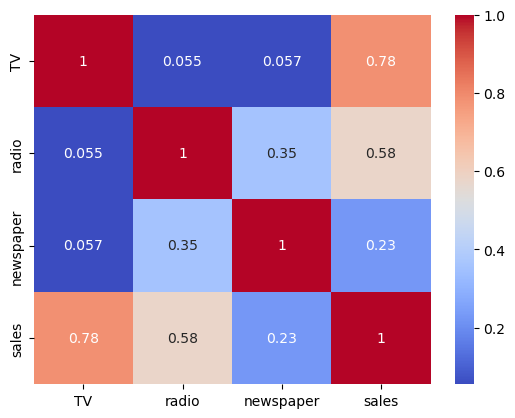

In [106]:
#check the correlation and drop the feature with low correlation.

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()  # df = your dataset
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [107]:
#newspaper to the target has the lowest correlation, hence ill be dropping newspaper.

feaure_cols = ['TV', 'radio']
x = data[feature_cols]
y = data.sales
linreg = linear_reg(x,y, gridsearch= True)

Best Parameters: {'copy_X': True, 'fit_intercept': False}
Mean Cross Validation Score of best model: 0.7917574687362311
RMSE for the test is: 0.3420807124924135


In [108]:
#Since there is no significant imporovement in the quality, therefore the newspaper column shouldnt be discarded. 

In [109]:
#Handling Categorical features


#Ill create a new feature called Area, and randomly assign observation to be rural, subburban or urban. 

np.random.seed(123456)
nums = np.random.rand(len(data))
mask_suburban = (nums>0.33) & (nums <0.66)
mask_urban=nums>0.66
data['Area']= 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
0,0.969852,0.981522,1.778945,1.552053,rural
1,-1.197376,1.082808,0.669579,-0.696046,urban
2,-1.516155,1.528463,1.783549,-0.907406,rural
3,0.052050,1.217855,1.286405,0.860330,urban
4,0.394182,-0.841614,1.281802,-0.215683,suburban


In [110]:
#I want to represent Area Numerically, where 0 = rural, 1 = urban,and 2 = suburban

#Because that would imply an ordered relationship between suburan and urban, and thus urban is somehow 'twice' the sub urban category. 

'The Area feature is unordered, so i can have to create additional dummy variables.'

'The Area feature is unordered, so i can have to create additional dummy variables.'

In [111]:
area_dummies = pd.get_dummies(data.Area, prefix= 'Area')
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,True,False,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False


In [112]:
#I want to convert this to categorical data

area_dummies = pd.get_dummies(data.Area, prefix='Area')

# Convert True/False to 1/0
new_dummies = area_dummies.astype(int)

new_dummies.head()




,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [113]:
#since two dummy variable capture all the information. and implicitly defines rural as 'baseline levels'

new_dummies = pd.get_dummies(data.Area, prefix= 'Area').iloc[:,1:]
new_dummies = new_dummies.astype(int)
new_dummies.head()

,Area_suburban,Area_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0


In [114]:
#Concatenate the dummy variable columns into the Dataframe (axis=0 means rows, axis =1 means columns)
data = pd.concat([data, new_dummies], axis = 1)
data.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.552053,rural,0,0
1,-1.197376,1.082808,0.669579,-0.696046,urban,0,1
2,-1.516155,1.528463,1.783549,-0.907406,rural,0,0
3,0.052050,1.217855,1.286405,0.860330,urban,0,1
4,0.394182,-0.841614,1.281802,-0.215683,suburban,1,0


In [115]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']
x = data[feature_cols]
y= data.sales
linreg = linear_reg(x,y)

RMSE for the test is: 0.3477518444996748


In [116]:
feature_cols.insert(0, 'intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print (c1,c2)

intercept 0.015506348951114132
TV 0.7384283237757137
radio 0.5330232978366305
newspaper 0.013234638418231665
Area_suburban -0.061558949056372825
Area_urban 0.036675890646927195


/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_11348/3161853363.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.sales, color='b', ax=axes[0,0])
/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_11348/3161853363.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

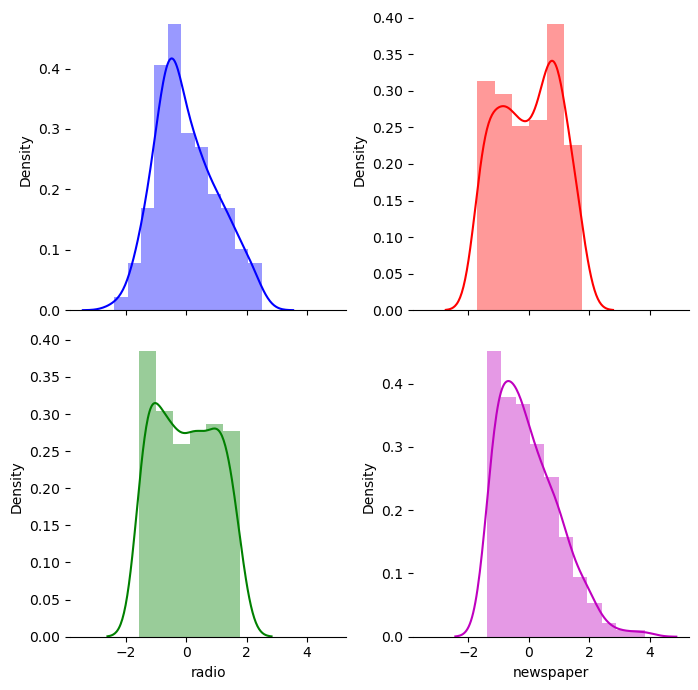

In [117]:
 #Visualizations :

#distribution of data features
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.despine(left=True)

sns.distplot(data.sales, color='b', ax=axes[0,0])
sns.distplot(data.TV, color='r', ax=axes[0,1])
sns.distplot(data.radio, color='g', ax=axes[1,0])
sns.distplot(data.newspaper, color='m', ax=axes[1,1])

plt.tight_layout()
plt.show()


In [118]:
'''observation : Sales seems to be a normal distribution. Spending on newspaper seems to be right skewed, a bit above the average.
#most of the spends on newspaper is fairly low where spneds on radio and TV seems to be uniform distribution. Spends on TV are comparatively higher than spend on radio and dnewspaper.'''

'observation : Sales seems to be a normal distribution. Spending on newspaper seems to be right skewed, a bit above the average.\n#most of the spends on newspaper is fairly low where spneds on radio and TV seems to be uniform distribution. Spends on TV are comparatively higher than spend on radio and dnewspaper.'

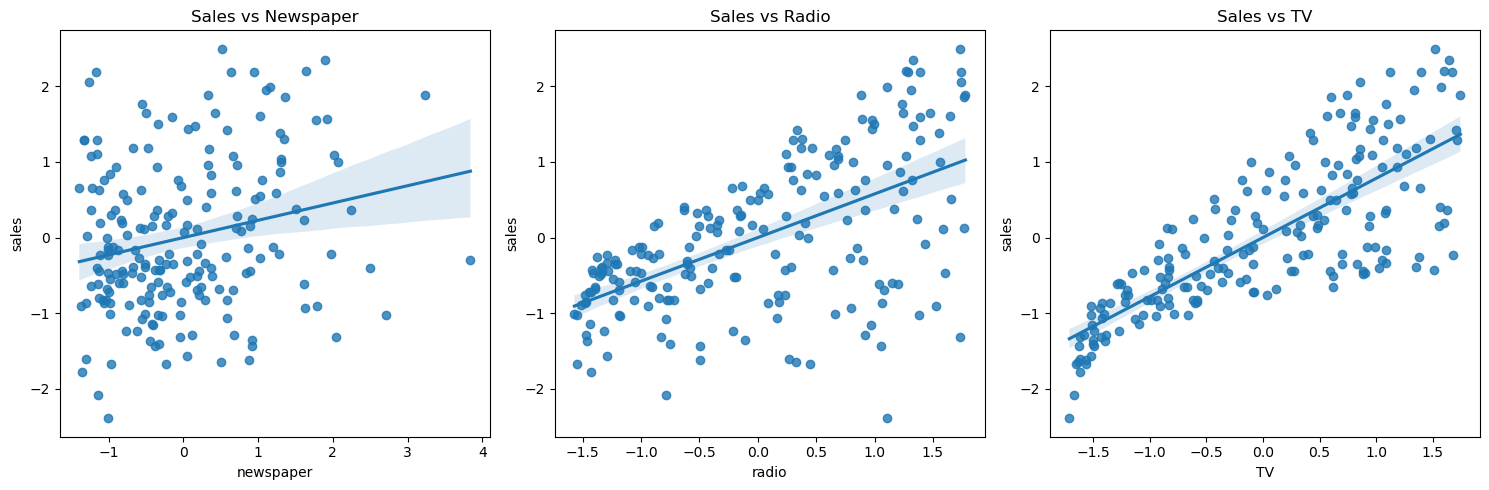

In [119]:
#Is there a relationship between sales and spend various advertising channels?
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='newspaper', y='sales', data=data, ax=axes[0])
axes[0].set_title('Sales vs Newspaper')

sns.regplot(x='radio', y='sales', data=data, ax=axes[1])
axes[1].set_title('Sales vs Radio')

sns.regplot(x='TV', y='sales', data=data, ax=axes[2])
axes[2].set_title('Sales vs TV')

plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


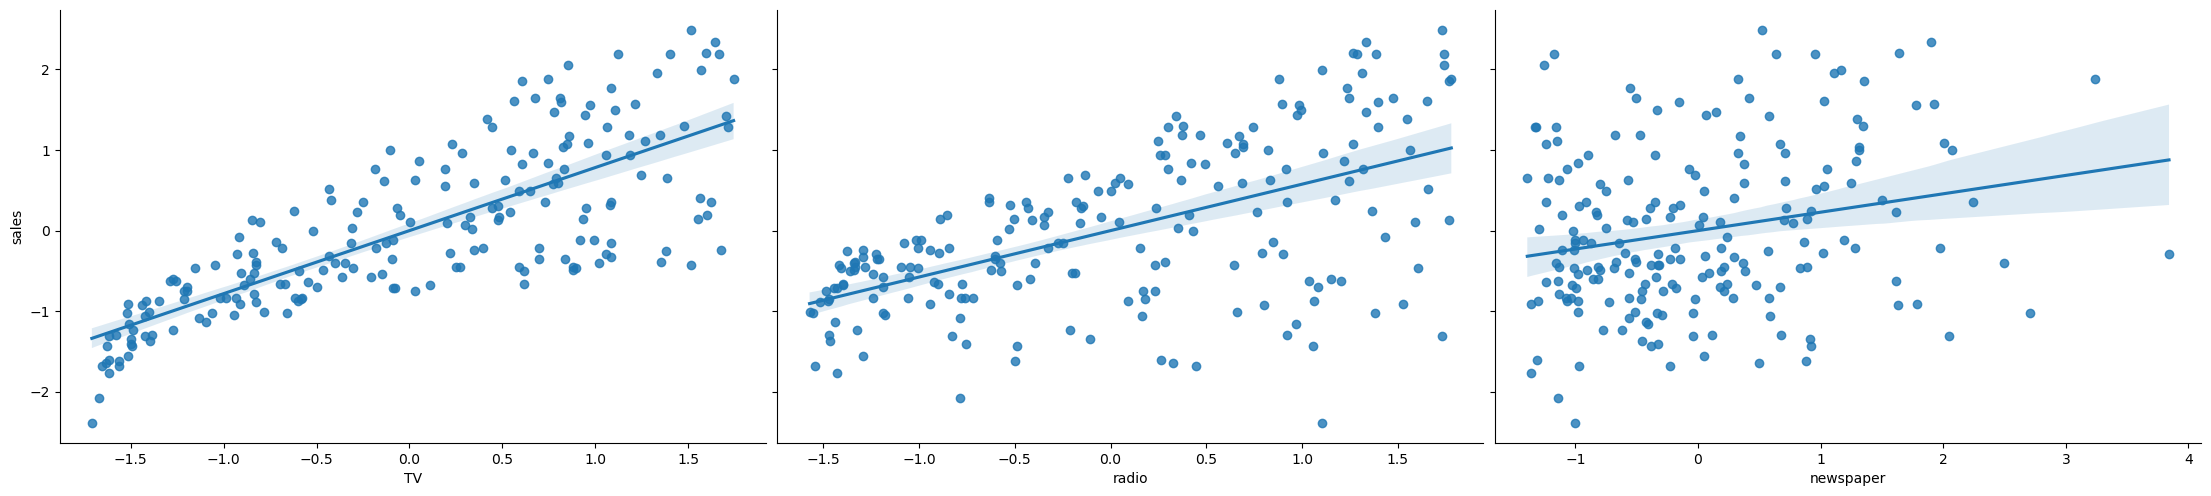

In [120]:
import seaborn as sns
sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars= 'sales', size =5, aspect = 1.5, kind = 'reg')
plt.show()


In [121]:
#observation:
#Strong relationship between TV ads and sales
#Weak relationship between Radio and sales
#Very weak to no relationship between Newspapaer ads and sales

In [126]:
#Calaculating and Plotting heatmap corelation
new_data= data.drop(columns=['Area']).corr()


In [128]:
new_data.corr()

,TV,radio,newspaper,sales,Area_suburban,Area_urban
TV,1.000000,-0.045474,-0.212499,0.836193,-0.118419,-0.156362
radio,-0.045474,1.000000,0.401548,0.502753,-0.317378,0.035539
newspaper,-0.212499,0.401548,1.000000,0.023445,-0.215696,-0.067439
sales,0.836193,0.502753,0.023445,1.000000,-0.303219,-0.074361
Area_suburban,-0.118419,-0.317378,-0.215696,-0.303219,1.000000,-0.882145
Area_urban,-0.156362,0.035539,-0.067439,-0.074361,-0.882145,1.000000


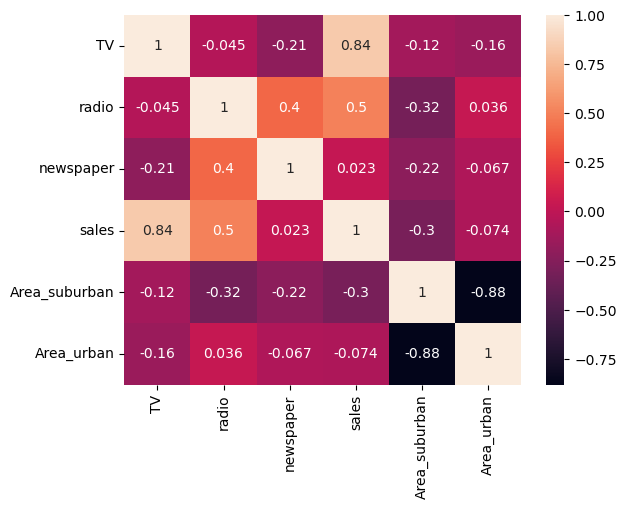

In [130]:
sns.heatmap(new_data.corr(), annot=True)
plt.show()

In [132]:
#observation

#The diagonal of the above matrix shows the auto--correlation of the variables. it is always 1. You can observe that the correlation 
#between TV and sales is highest at 0.84 i.e and then between sales and radio i.e 0.5

#Correlation can vary from -1 to +1. Closer to +1 means strong positive correlation and close to -1 means strong negative correlation. 

#Closer to 0 means not very strongly correlated variables with strong correlations are mostly probably candidates for model building.